# **Ejercicio 1 de Regresión Lineal** - Notas de estudiantes

## Contexto

Description:
The data consists of Marks of students including their study time & number of courses. The dataset is downloaded from UCI Machine Learning Repository.

Properties of the Dataset: \
Number of Instances: 100\
Number of Attributes: 3 including the target variable.

The project is simple yet challenging as it is has very limited features & samples. Can you build regression model to capture all the patterns in the dataset, also maitaining the generalisability of the model?

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the student marks wrt multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

## 1. Cargar los datos

Importar librerías

In [1]:
import pandas as pd

Cargar el archivo csv

In [2]:
df = pd.read_csv('Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [4]:
df.index

RangeIndex(start=0, stop=100, step=1)

In [5]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [6]:
df.values

array([[ 3.   ,  4.508, 19.202],
       [ 4.   ,  0.096,  7.734],
       [ 4.   ,  3.133, 13.811],
       [ 6.   ,  7.909, 53.018],
       [ 8.   ,  7.811, 55.299],
       [ 6.   ,  3.211, 17.822],
       [ 3.   ,  6.063, 29.889],
       [ 5.   ,  3.413, 17.264],
       [ 4.   ,  4.41 , 20.348],
       [ 3.   ,  6.173, 30.862],
       [ 3.   ,  7.353, 42.036],
       [ 7.   ,  0.423, 12.132],
       [ 7.   ,  4.218, 24.318],
       [ 3.   ,  4.274, 17.672],
       [ 3.   ,  2.908, 11.397],
       [ 4.   ,  4.26 , 19.466],
       [ 5.   ,  5.719, 30.548],
       [ 8.   ,  6.08 , 38.49 ],
       [ 6.   ,  7.711, 50.986],
       [ 8.   ,  3.977, 25.133],
       [ 4.   ,  4.733, 22.073],
       [ 6.   ,  6.126, 35.939],
       [ 5.   ,  2.051, 12.209],
       [ 7.   ,  4.875, 28.043],
       [ 4.   ,  3.635, 16.517],
       [ 3.   ,  1.407,  6.623],
       [ 7.   ,  0.508, 12.647],
       [ 8.   ,  4.378, 26.532],
       [ 5.   ,  0.156,  9.333],
       [ 4.   ,  1.299,  8.837],
       [ 8

## 2. EDA

Estadísticas básicas o descriptiva

In [8]:
round(df.describe(),1)

,number_courses,time_study,Marks
count,100.0,100.0,100.0
mean,5.3,4.1,24.4
std,1.8,2.4,14.3
min,3.0,0.1,5.6
25%,4.0,2.1,12.6
50%,5.0,4.0,20.1
75%,7.0,6.2,36.7
max,8.0,8.0,55.3


Distribuciones de las variables númericas

<Axes: >

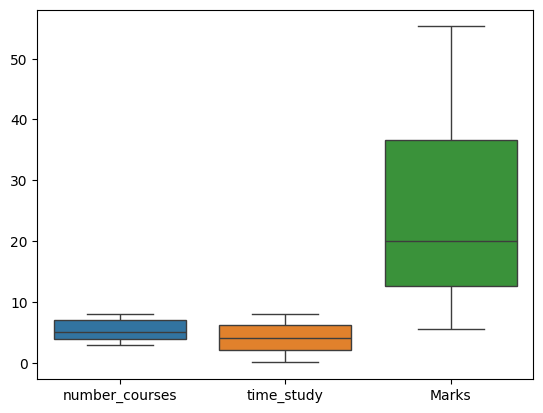

In [10]:
import seaborn as sns
sns.boxplot(data=df)

Tipos de datos

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Group by number_courses

In [29]:
df.shape

(100, 3)

In [17]:
nr_Courses = df.groupby('number_courses').mean().reset_index()

In [21]:
nr_Courses

,number_courses,time_study,Marks
0,3,3.685773,18.433318
1,4,3.598524,19.029952
2,5,3.070600,17.641000
3,6,4.838750,29.863062
4,7,4.242667,29.401467
5,8,4.955750,33.835375


<Axes: xlabel='time_study', ylabel='Marks'>

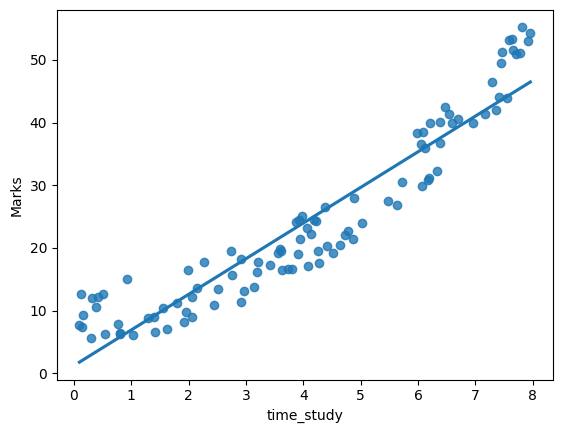

In [53]:
sns.regplot(data=df,x='time_study', y='Marks',ci=0.95)

## 3. Split df a X e Y

Y, variable target, output, dependiente

In [22]:
y = df['Marks'] 

In [23]:
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

X, variables features, inputs, independientes

In [24]:
x = df.drop('Marks', axis=1)

In [25]:
x

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


## 4. Split data en Train / Test set

Importar librerías para separar en containers de 80% y 20%

In [26]:
from sklearn.model_selection import train_test_split

Split de containers

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=100)
X_train

,number_courses,time_study
29,4,1.299
83,5,3.197
82,4,7.410
43,5,1.557
28,5,0.156
...,...,...
79,3,0.805
87,3,1.033
67,3,0.550
24,4,3.635


In [30]:
Y_train

29     8.837
83    16.106
82    44.099
43    10.429
28     9.333
       ...  
79     6.349
87     6.053
67     6.185
24    16.517
8     20.348
Name: Marks, Length: 80, dtype: float64

In [31]:
X_test

,number_courses,time_study
37,6,7.283
62,6,3.606
26,7,0.508
41,6,2.754
35,3,7.543
25,3,1.407
36,4,2.966
33,6,6.594
77,8,5.985
21,6,6.126


In [32]:
Y_test

37    46.453
62    19.590
26    12.647
41    15.725
35    43.978
25     6.623
36    13.119
33    39.965
77    38.278
21    35.939
85    39.957
50    40.602
92    23.916
69    21.400
96     5.609
78    49.544
72    20.398
5     17.822
40     7.336
11    12.132
Name: Marks, dtype: float64

## 5. Construcción de modelo con Regresión Lineal

Importamos funciones de modele de RL

In [33]:
from sklearn.linear_model import LinearRegression

Instanciamos modelo

In [34]:
rl=LinearRegression()

Entrenamos modelo

In [35]:
rl.fit(X_train,Y_train)

LinearRegression()

Aplicamos el modelo para hacer la predicción

Primero, predecimos con el df de entrenamiento (80%)

In [36]:
y_rl_train_predict=rl.predict(X_train)

In [37]:
y_rl_train_predict

array([6.63398688e+00, 1.89259583e+01, 4.01088606e+01, 9.94235611e+00,
       2.26794961e+00, 1.26483924e+01, 3.19079076e+01, 2.81117879e+01,
       2.74818401e+01, 2.54447734e+01, 1.22040129e+01, 3.08351604e+01,
       4.66324764e+01, 2.83089889e+01, 2.59318467e+01, 1.79557094e+01,
       6.54656771e+00, 5.91571709e+00, 4.86807244e+01, 7.15985628e+00,
       2.02189978e+00, 3.76109810e+01, 4.71033420e+01, 2.29793092e+01,
       3.63563376e+01, 3.23251237e+01, 4.04037593e+01, 4.25455815e+01,
       2.42946598e+01, 2.23171718e+01, 4.55478707e+01, 1.02219499e+01,
       4.09901102e+01, 8.91297999e+00, 4.58984503e+01, 1.99834006e+01,
       2.85662200e+01, 2.82649407e+01, 1.52065279e+01, 2.03175468e+01,
       4.89546147e+01, 4.87905063e+01, 2.20531085e+01, 1.12898964e+01,
       2.88839328e+01, 1.94894952e+01, 2.11604518e+01, 4.01300947e+01,
       1.28732082e+01, 1.50419680e+01, 2.56967525e+01, 2.28480675e+01,
       2.01091644e+01, 3.87558425e+01, 4.80069543e+01, 2.28149750e+01,
      

Ahora, predecimos con el df desconocido (de test)

In [38]:
y_rl_test_predict=rl.predict(X_test)

In [39]:
y_rl_test_predict

array([43.20336968, 23.06147625,  7.98632784, 18.39438536, 38.94231362,
        5.33049473, 15.76548983, 39.4291612 , 39.88336767, 36.8655479 ,
       41.06657381, 40.02624208, 27.05524843, 24.93488597, -0.72795894,
       46.01873635, 23.00189756, 20.8977428 ,  0.28520949,  7.52071431])

Evaluamos la performance del modelo 


La performance del modelo se mide con el MSE, el que menor error promedio tenga, menos es las diferencia entre los residuos y la recta trazada.

Y observando los resultados del r cuadrado

Importamos la función

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

Calculamos el error medio cuadrado entre las notas originales (de entrenamiento primero) y lo predicho con el modelo

In [42]:
rl_train_mse = mean_squared_error(Y_train,y_rl_train_predict) 
print('El error medio cuadrado del modelo con datos de entrenamiento es de:' ,rl_train_mse)

El error medio cuadrado del modelo con datos de entrenamiento es de: 12.055082127744857


R cuadrado del train set

In [43]:
rl_train_r2 = r2_score(Y_train, y_rl_train_predict)
print('El R cuadrado del modelo con datos de entrenamiento es de:' ,rl_train_r2)

El R cuadrado del modelo con datos de entrenamiento es de: 0.9404526569528092


Calculamos el error medio cuadrado entre las notas originales (de test, desconocido) y lo predicho con el modelo

In [44]:
rl_test_mse = mean_squared_error(Y_test,y_rl_test_predict) 
print('El error medio cuadrado del modelo con datos de test es de:' ,rl_test_mse)

El error medio cuadrado del modelo con datos de test es de: 12.646486244731339


R cuadrado del test set

In [45]:
rl_test_r2 = r2_score(Y_test, y_rl_test_predict)
print('El R cuadrado del modelo con datos de test es de:' ,rl_test_r2)

El R cuadrado del modelo con datos de test es de: 0.9381738467744822
